From: [External] - UBL Daily Flasher 05.03.2024
To: C:\Users\Shithi.Maitra\Unilever Codes\Email Attachments\Output


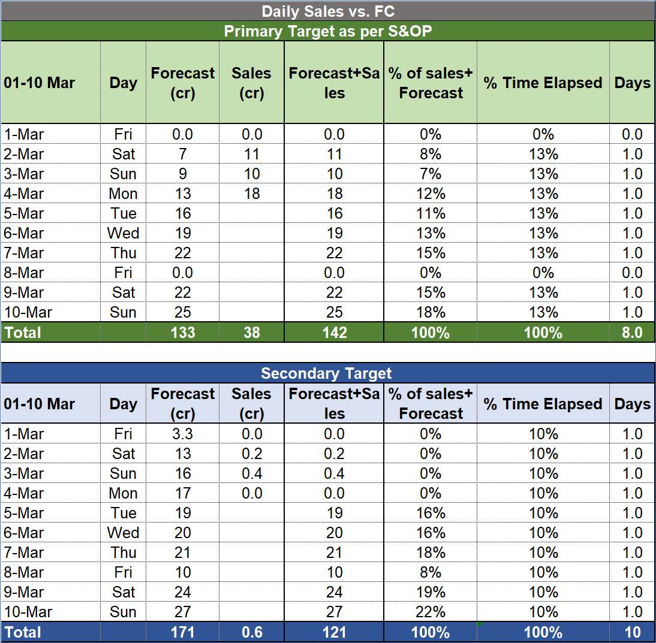

image001.jpg


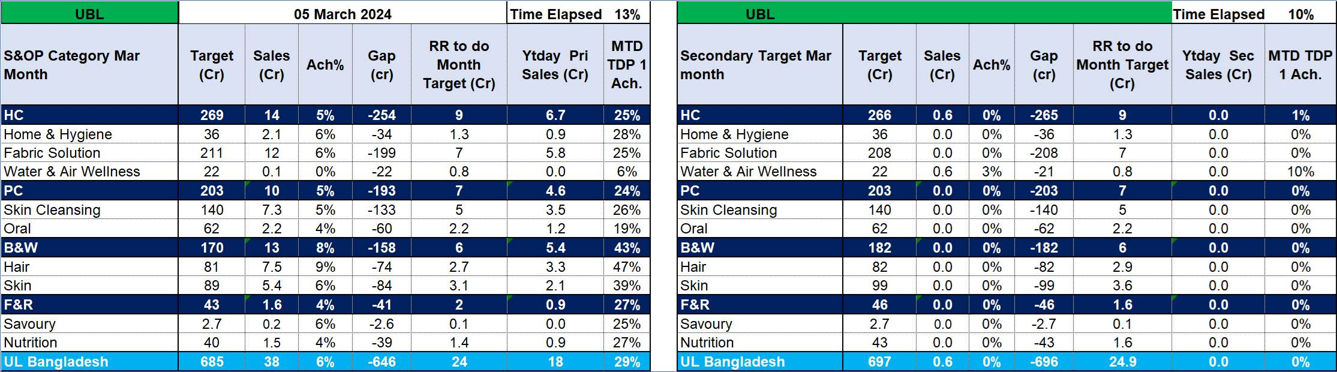

image003.jpg


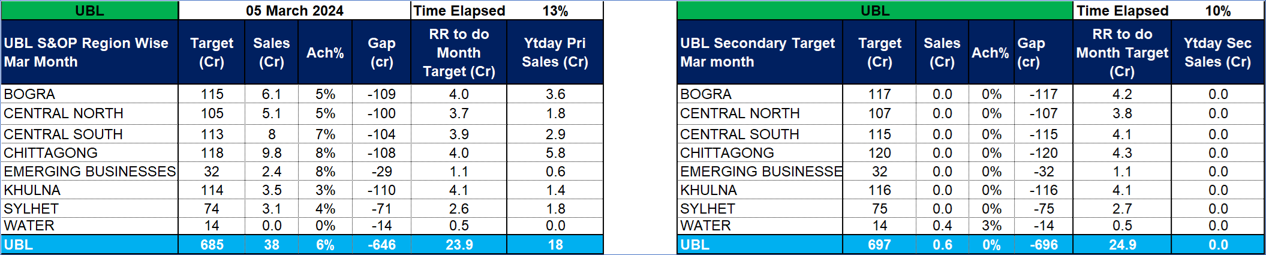

image005.jpg


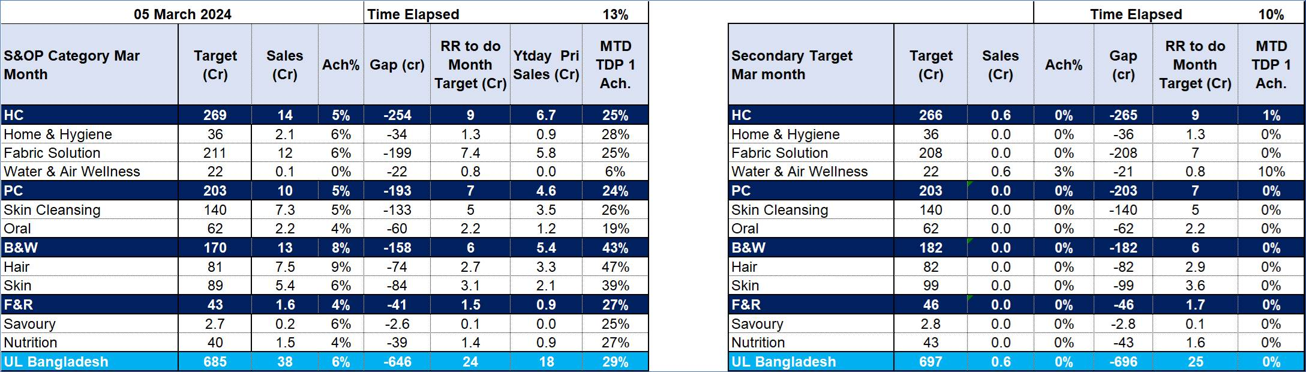

image007.jpg


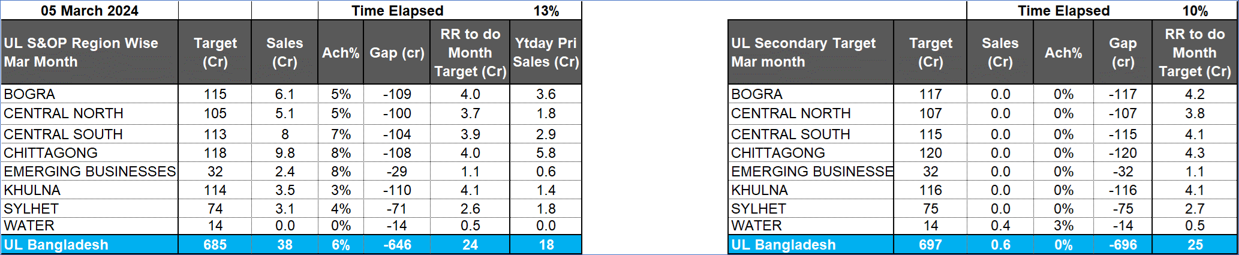

image009.jpg


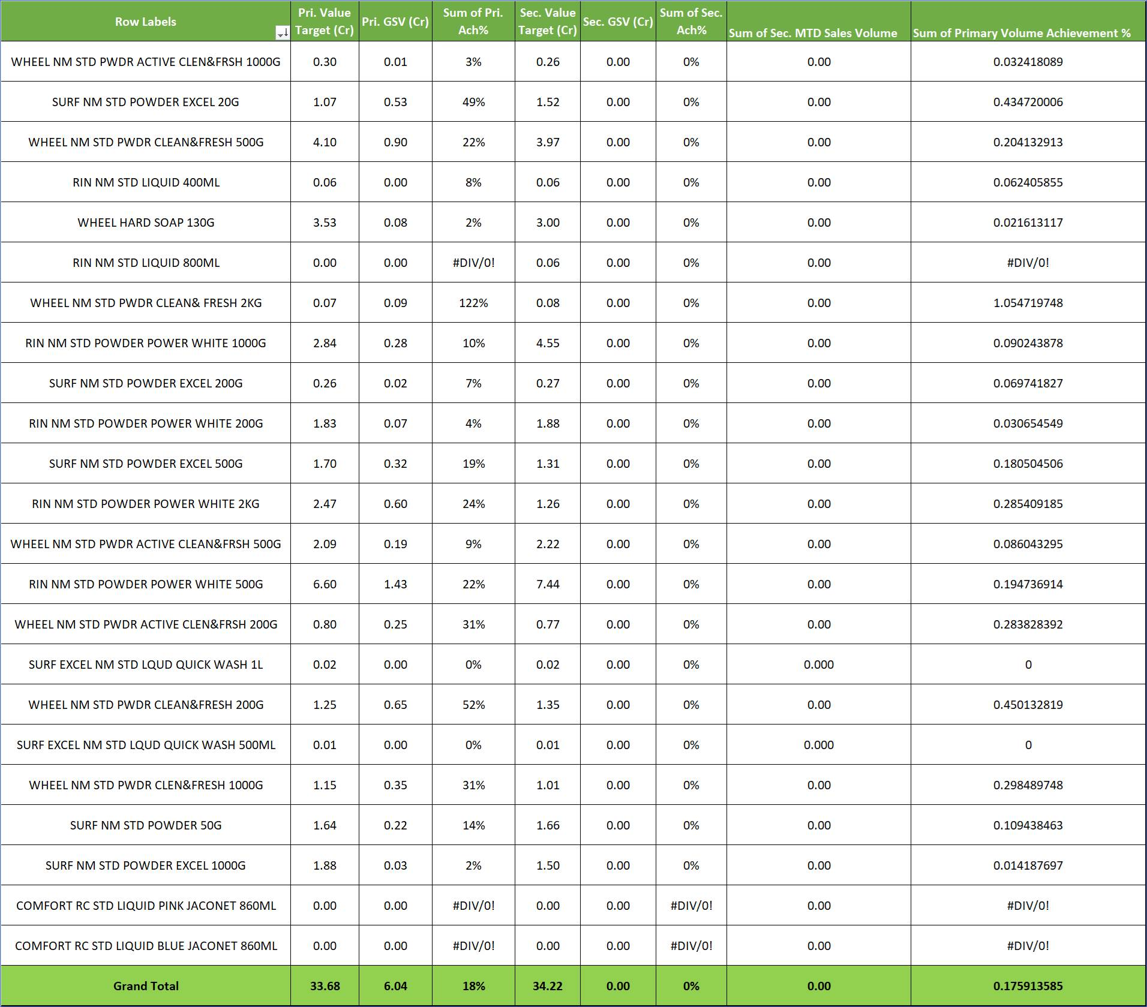

image011.jpg


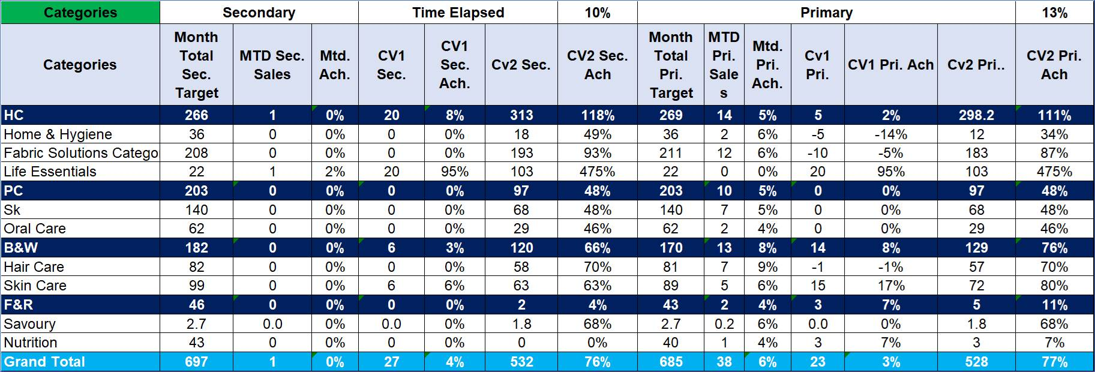

image013.jpg


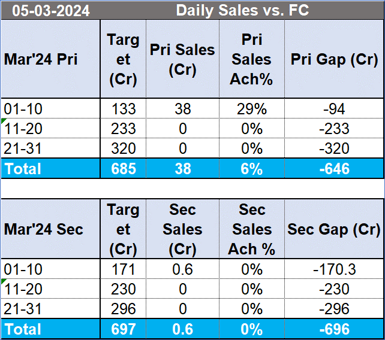

image016.jpg


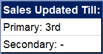

image018.jpg

For: GQl2yIAav9i3ejwzWC5XKu
Sent C:\Users\Shithi.Maitra\Unilever Codes\Email Attachments\Output\image018.jpg As: 05.03.2024 
Sent C:\Users\Shithi.Maitra\Unilever Codes\Email Attachments\Output\image001.jpg As: 05.03.2024 Day View
Sent C:\Users\Shithi.Maitra\Unilever Codes\Email Attachments\Output\image007.jpg As: 05.03.2024 Category View
Sent C:\Users\Shithi.Maitra\Unilever Codes\Email Attachments\Output\image009.jpg As: 05.03.2024 Region View
Sent C:\Users\Shithi.Maitra\Unilever Codes\Email Attachments\Output\image016.jpg As: 05.03.2024 TDP View


In [22]:
# lib: C:\Users\Shithi.Maitra\Anaconda3\Lib\site-packages\pywhatkit
# ref: https://github.com/Sven-Bo/download-messages-attachments-from-outlook/blob/master/retrieve_outlook_data.py
# sales grp: GQl2yIAav9i3ejwzWC5XKu, test grp: IVzs19MPkFB54OCxiuSrFK, only me grp: DXqnN42tpV27ZoVWszBH9D

# import
from pathlib import Path
import win32com.client
import re
from PIL import Image
from datetime import datetime, timedelta
import time
import pywhatkit

# output folder
output_dir = Path.cwd() / 'Output'
output_dir.mkdir(parents=True, exist_ok=True)

# outlook inbox
outlook = win32com.client.Dispatch('Outlook.Application').GetNamespace('MAPI')
inbox = outlook.GetDefaultFolder(6)

# date
today = (datetime.today() - timedelta(0)).strftime('%d.%m.%Y')

# to send
to_send_seq = [8, 0, 3, 4, 7]
to_send_path = []
to_send_caption = ['Day View', '', '', 'Category View', 'Region View', '', '', 'TDP View', '']
# groups = ['DXqnN42tpV27ZoVWszBH9D'] 
groups = ['GQl2yIAav9i3ejwzWC5XKu']

# emails
messages = inbox.Items

# subject
for message in reversed(messages): 
    subject = message.Subject
    if 'UBL Daily Flasher ' + today not in subject: continue
        
    # embedded images
    to_send_count = 0
    print('From: ' + subject + '\nTo: ' + str(output_dir))
    attachments = message.Attachments
    for attachment in attachments:
        filename = re.sub('[^0-9a-zA-Z\.]+', '', attachment.FileName)
        if '.jpg' in filename or '.jpeg' in filename or '.png' in filename:

            # save
            attachment.SaveAsFile(output_dir / filename)
            filepath = str(output_dir) + '\\' + filename

            # reformat, resize, convert, overwrite
            im = Image.open(filepath)
            rgb_im = im.convert('RGB')
            rgb_im = rgb_im.resize(tuple(int(s*0.60) for s in rgb_im.size))
            new_filename = filename.split('.')[0] + '.jpg'
            new_filepath = str(output_dir) + '\\' + new_filename
            rgb_im.save(new_filepath)

            # record
            display(rgb_im)
            print(new_filename)
            to_send_path.append(new_filepath)
            to_send_count = to_send_count + 1

    # latest
    if to_send_count > 0: break
        
# test/send
for grp in groups: 
    print('\nFor: ' + grp)
    for s in to_send_seq: 
        title = today + ' ' + to_send_caption[s]
        pywhatkit.sendwhats_image(receiver=grp, caption=title, img_path=to_send_path[s], tab_close=True, close_time=10)
        print('Sent ' + to_send_path[s] + ' As: ' + title)
        